In [27]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# import some data to play with
iris = datasets.load_iris()
#data = pd.DataFrame(iris)
iris
df = pd.DataFrame(iris['data'],columns = iris["feature_names"])
df["targets"] = iris["target"]
df["target1"] = ["Setosa" if i == 0 else "Versicolor" if i ==1 else "Virginica" for i in df.targets]
df.iloc[1:3,2:4] = np.nan
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,target1
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,NaN,NaN,0,Setosa
2,4.7,3.2,NaN,NaN,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [28]:
# create a data summary
# check for nulls
# check data types

In [30]:
# create a function that converts the targets to "Setosa" if target =0 else "Versicolor" if i = 1 else "Virginica"
# use map apply for above function and create a new colum called output
# drop columns: "targets","target1"
# shuffle the data
df = df.sample(frac = 1)
df.head(2)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,target1
126,6.2,2.8,4.8,1.8,2,Virginica
144,6.7,3.3,5.7,2.5,2,Virginica


In [31]:
# EDA
# visualize all the columns using appropriate visualization
# create a scatter plot using any two columns and use the output as the hue ( seaborn)
# create a corelation heatmap

In [51]:
# standardize the data
# research on data scaling and standardizing
df = df.dropna()
x = df.drop(["targets","target1"],1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit_transform(x)

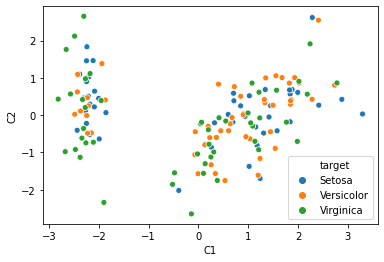

In [52]:
# PCA
# research what is PCA analysis
from sklearn.decomposition import PCA
pca =PCA()
pca_data = pca.fit_transform(scaled)

data = pd.DataFrame(pca_data[:,0:2],columns = ["C1","C2"])
data["target"] = df.target1
data.head()

import seaborn as sns
sns.scatterplot(data = data,x = "C1",y = "C2",hue = "target")

In [ ]:
#Modelling
# train test split
# create three models ( Logistic regression, Support vector machine, gradient boosting)
# train all the models
# predict using the three models
# use accuracy score, confusion matrix and  classification report to compare the three models